In [14]:
import datetime
import cv2 as cv
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt

tiempo de deteccio: 1.731151
se detectaron 4


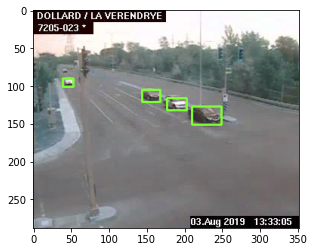

In [15]:
with tf.gfile.FastGFile('frozen_inference_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    
with tf.Session() as sess:
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')

    img = cv.imread('./23.jpeg')
    rows = img.shape[0]
    cols = img.shape[1]
    inp = cv.resize(img, (300, 300))
    inp = inp[:, :, [2, 1, 0]]  # BGR2RGB

    start_detecction = datetime.datetime.now()
    out = sess.run([sess.graph.get_tensor_by_name('num_detections:0'),
                    sess.graph.get_tensor_by_name('detection_scores:0'),
                    sess.graph.get_tensor_by_name('detection_boxes:0'),
                    sess.graph.get_tensor_by_name('detection_classes:0')],
                   feed_dict={'image_tensor:0': inp.reshape(1, inp.shape[0], inp.shape[1], 3)})
    print(f"tiempo de deteccio: {(datetime.datetime.now() - start_detecction).total_seconds()}")

    num_detections = int(out[0][0])
    print(f"se detectaron {num_detections}")
    for i in range(num_detections):
        classId = int(out[3][0][i])
        score = float(out[1][0][i])
        bbox = [float(v) for v in out[2][0][i]]
        if score > 0.3:
            x = bbox[1] * cols
            y = bbox[0] * rows
            right = bbox[3] * cols
            bottom = bbox[2] * rows
            cv.rectangle(img, (int(x), int(y)), (int(right), int(bottom)), (125, 255, 51), thickness=2)
    plt.imshow(img)